In [1]:
import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
from material_params import Quartz, Calcite, CalciteUpper, Sapphire
from device_config import run_on_device
from plots import plot_permittivity

plt.rcParams.update({'mathtext.default': 'regular' })
plt.rcParams.update({'font.family': 'Arial' })

Metal device set to: Apple M1

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



/Users/usermc/.virtualenvs/optics/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/usermc/.virtualenvs/optics/lib/python3.10/site-packages/matplotlib/transforms.py:2877: ComplexWarning: Casting complex values to real discards the imaginary part
  vmin, vmax = map(float, [vmin, vmax])


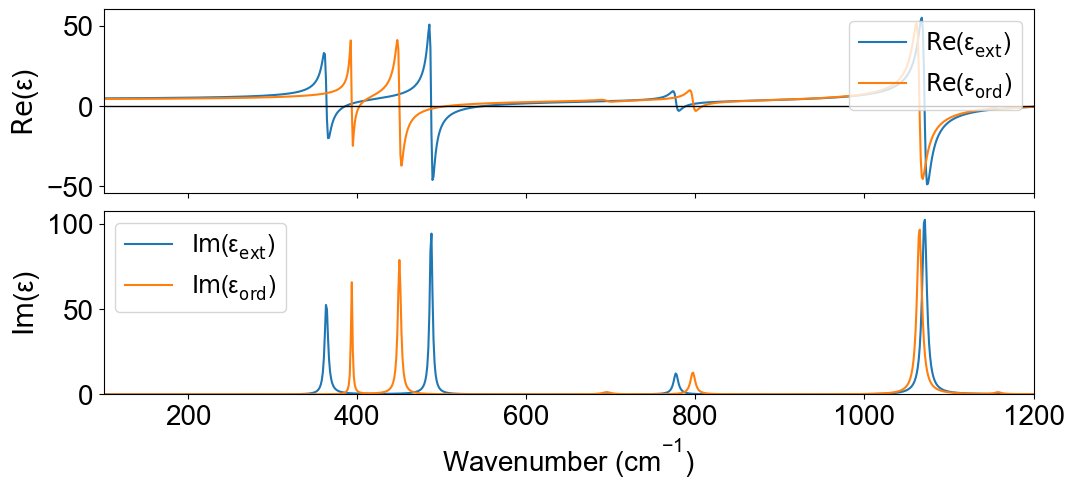

In [2]:
quartz = Quartz(frequency_length=900, run_on_device_decorator=run_on_device)
quartz_ext, quartz_ord = quartz.permittivity_fetch()

plot_permittivity(quartz, quartz_ext, quartz_ord)

/Users/usermc/.virtualenvs/optics/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/usermc/.virtualenvs/optics/lib/python3.10/site-packages/matplotlib/transforms.py:2877: ComplexWarning: Casting complex values to real discards the imaginary part
  vmin, vmax = map(float, [vmin, vmax])


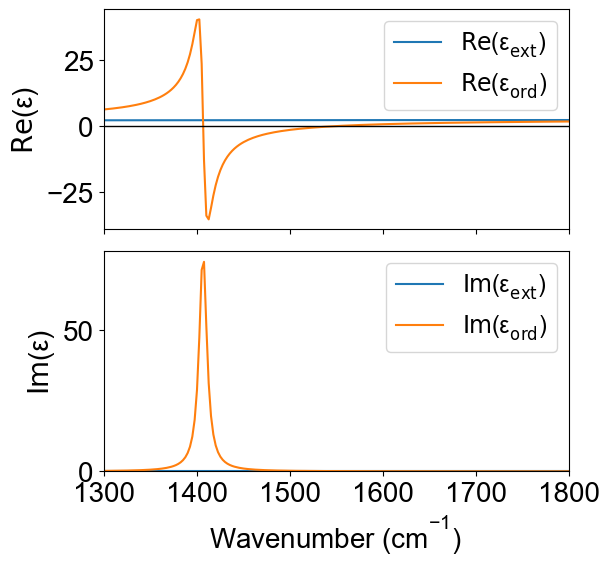

In [ ]:
calcite = Calcite(frequency_length=200, run_on_device_decorator=run_on_device)
calcite_ext, calcite_ord = calcite.permittivity_fetch()

plot_permittivity(calcite, calcite_ext, calcite_ord)

/Users/usermc/.virtualenvs/optics/lib/python3.10/site-packages/matplotlib/cbook/__init__.py:1298: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/Users/usermc/.virtualenvs/optics/lib/python3.10/site-packages/matplotlib/transforms.py:2877: ComplexWarning: Casting complex values to real discards the imaginary part
  vmin, vmax = map(float, [vmin, vmax])


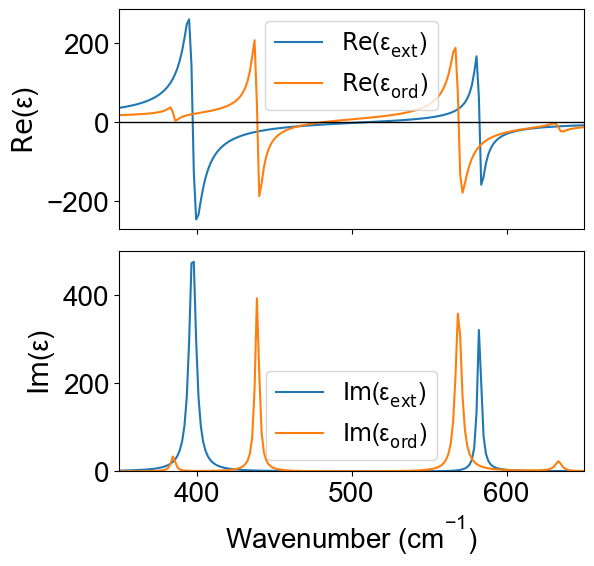

In [ ]:
sapphire = Sapphire(frequency_length=200, run_on_device_decorator=run_on_device)
sapphire_ext, sapphire_ord = sapphire.permittivity_fetch()

plot_permittivity(sapphire, sapphire_ext, sapphire_ord)